# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:

!pip3 install fancyimpute category_encoders -q

In [ ]:
!ls

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import IterativeImputer
from sklearn import preprocessing
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
import math
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV

# Read Dataset

In [2]:
# path_to_csv = "/content/gdrive/MyDrive/CPSC-5305-Project/Data/Indicators of Heart Disease.csv"
local_path_to_csv = "Data/Indicators of Heart Disease.csv"
health_df = pd.read_csv(local_path_to_csv)
health_df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


## Additional Details for Health DS (DataSet)

In [3]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [4]:
health_df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


## Getting Unique and Count of null values

In [ ]:
def get_unique_null_values(data):
  for col in data.columns:
    print("Columns: ", col)
    print("Unique Values: ",data[col].unique())
    print("Missing Values: ",data[col].isnull().sum())
    print("-------------------------------------------------------------------------")

get_unique_null_values(health_df)

## Count of Unique values in Categorical data

In [5]:
for col in health_df.columns:
  if health_df[col].dtype == "object":
    print("Columns: ", col)
    print("Unique Values: ",health_df[col].value_counts())
    print("-------------------------------------------------------------------------")

Columns:  State
Unique Values:  State
Washington              26152
New York                17800
Minnesota               16821
Ohio                    16487
Maryland                16418
Texas                   14245
Florida                 13393
Wisconsin               11276
Kansas                  11247
Massachusetts           11029
California              10952
Maine                   10646
Indiana                 10466
Virginia                10417
Arizona                 10185
Michigan                10058
South Carolina          10037
Utah                     9826
Connecticut              9784
Colorado                 9365
Georgia                  9236
Iowa                     8949
Vermont                  8811
New Jersey               8209
Hawaii                   7747
Nebraska                 7473
Missouri                 7438
South Dakota             7424
Montana                  7048
New Hampshire            6757
Idaho                    6280
Rhode Island             5893
Al

# Visualize Missing Data

<Axes: >

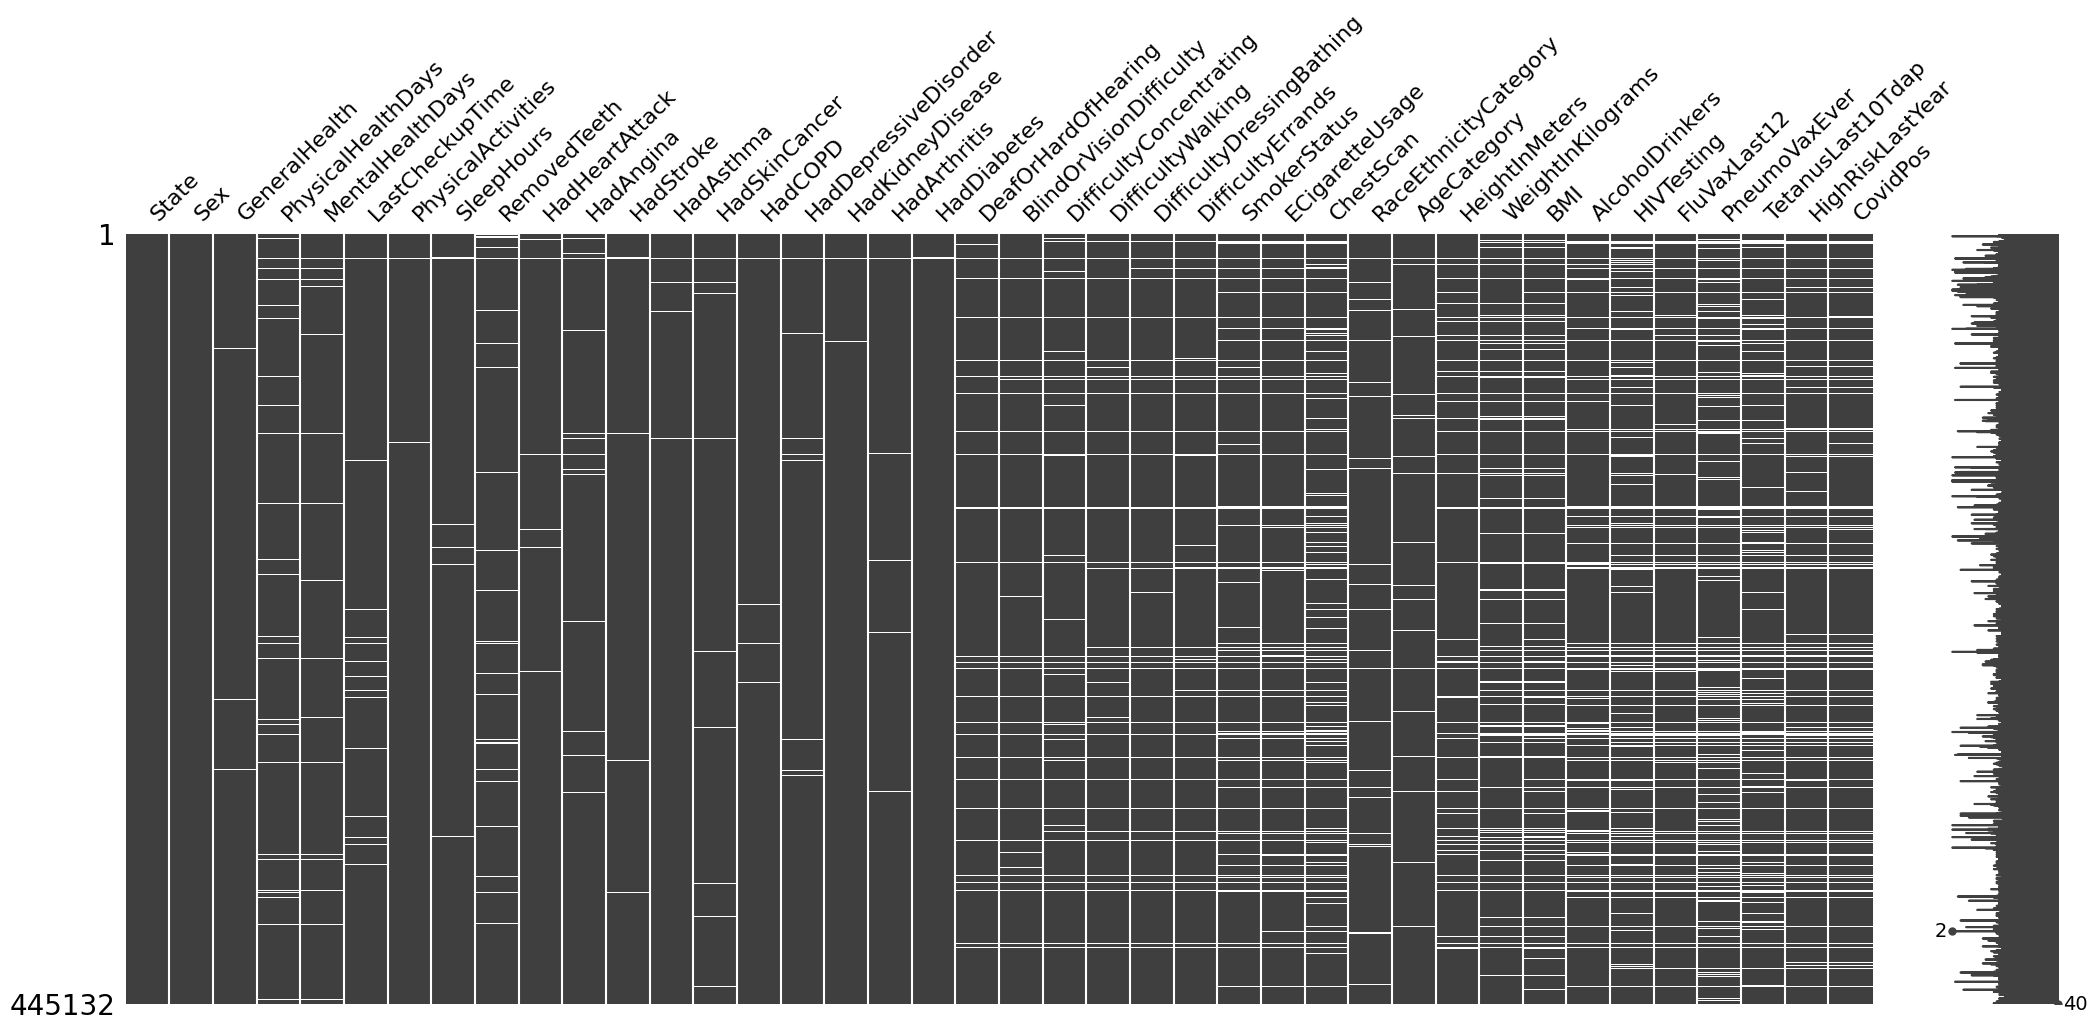

In [6]:
msno.matrix(health_df)

/Users/rohitnagotkar/Library/Mobile Documents/com~apple~CloudDocs/Mac Stuff/CPSC 5305 Intro to DS/.venv/lib/python3.12/site-packages/missingno/missingno.py:271: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<Axes: >

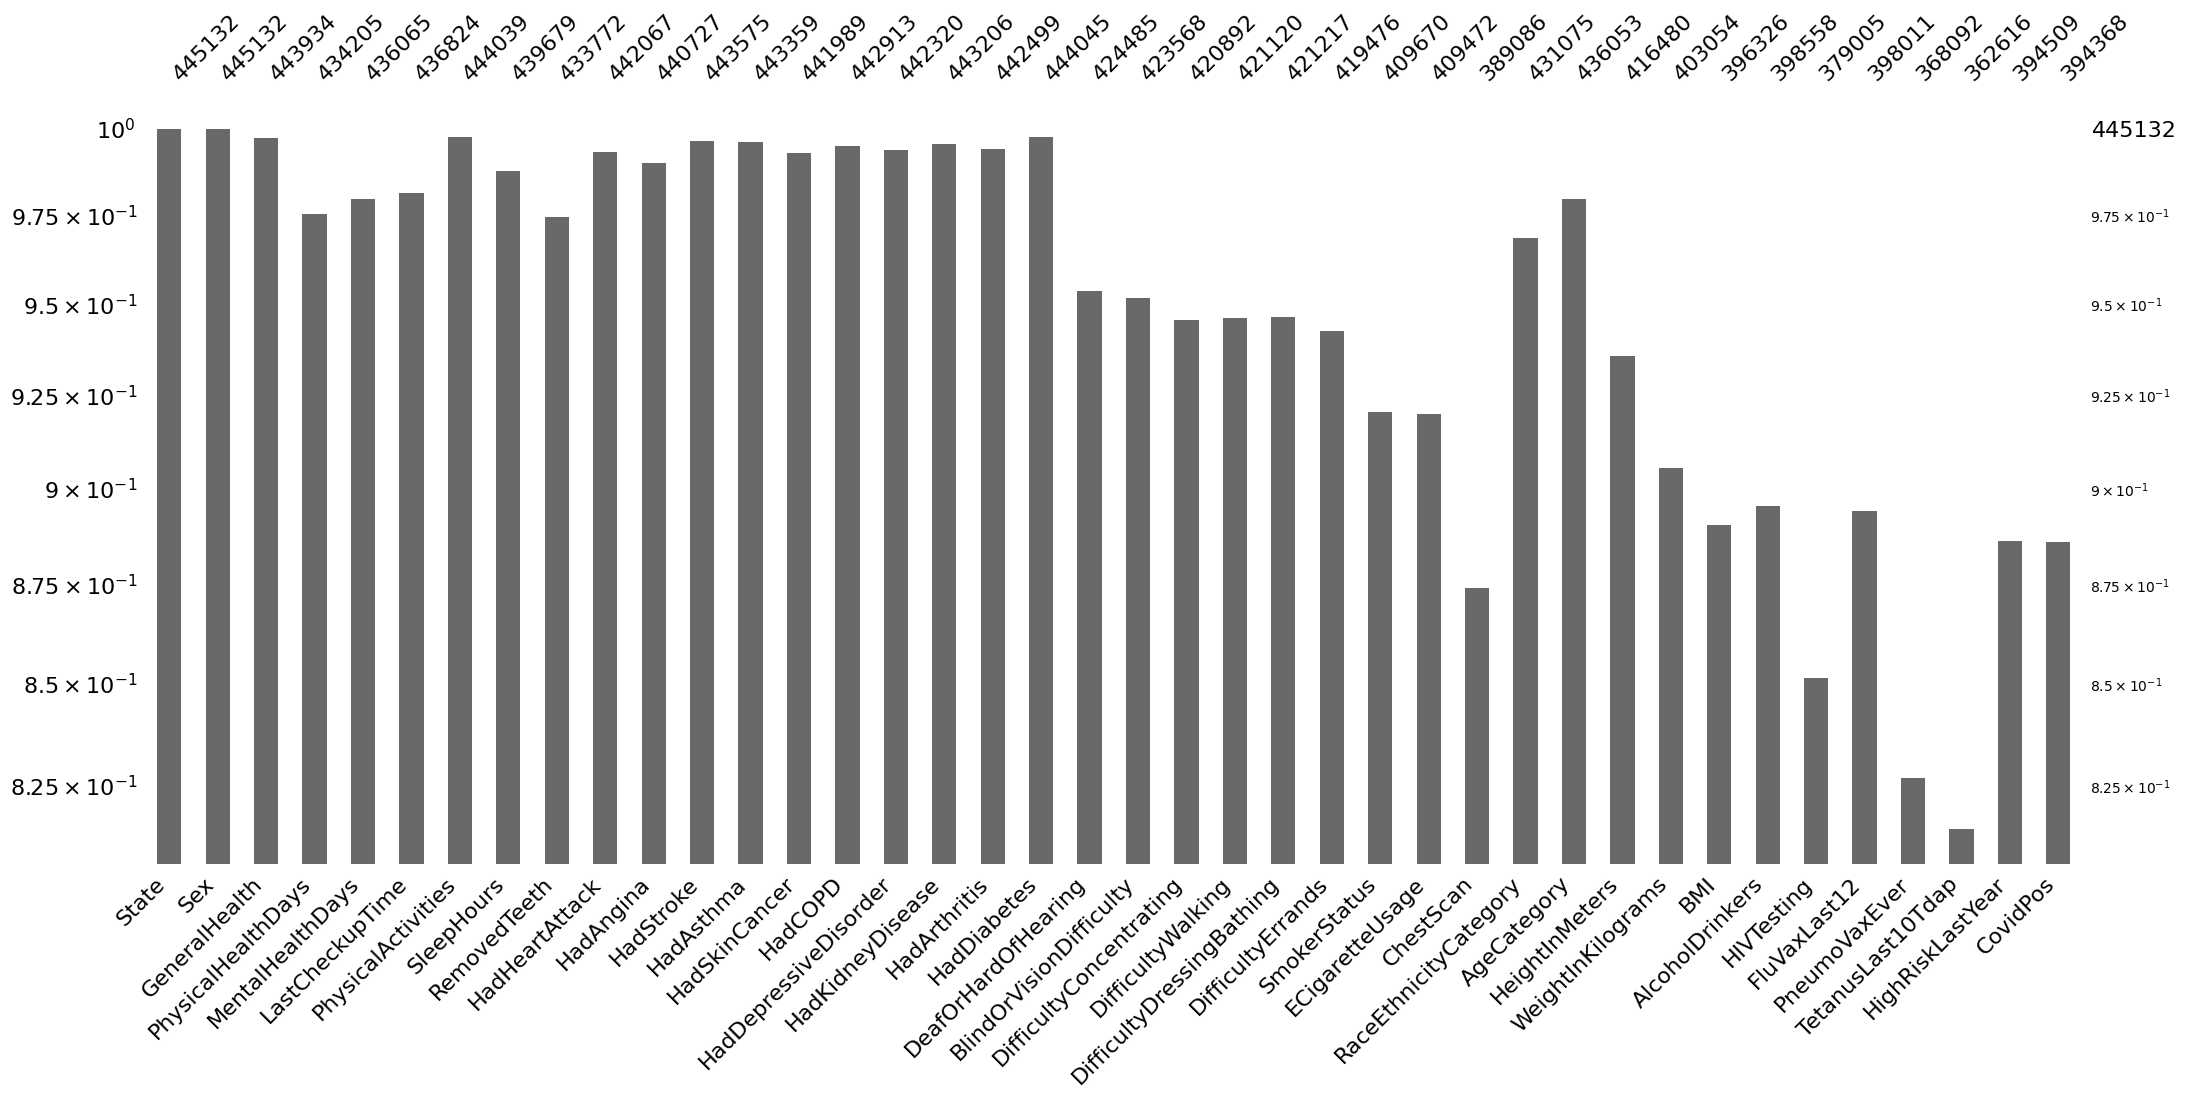

In [7]:
msno.bar(health_df, log=True)

# Data Cleaning

## Removed Duplicates

In [8]:
health_df_drop_dup = health_df.drop_duplicates()
health_df_drop_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              443782 non-null  object 
 3   PhysicalHealthDays         434053 non-null  float64
 4   MentalHealthDays           435913 non-null  float64
 5   LastCheckupTime            436674 non-null  object 
 6   PhysicalActivities         443887 non-null  object 
 7   SleepHours                 439527 non-null  float64
 8   RemovedTeeth               433620 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  440575 non-null  object 
 11  HadStroke                  443423 non-null  object 
 12  HadAsthma                  443207 non-null  object 
 13  HadSkinCancer              441837 

## Remove null field values for our Label Column

In [9]:
health_df_filtered = health_df_drop_dup.dropna(subset=['HadHeartAttack'])
print(health_df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 441915 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      441915 non-null  object 
 1   Sex                        441915 non-null  object 
 2   GeneralHealth              440820 non-null  object 
 3   PhysicalHealthDays         431318 non-null  float64
 4   MentalHealthDays           433123 non-null  float64
 5   LastCheckupTime            433876 non-null  object 
 6   PhysicalActivities         440943 non-null  object 
 7   SleepHours                 436719 non-null  float64
 8   RemovedTeeth               430905 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  438327 non-null  object 
 11  HadStroke                  440845 non-null  object 
 12  HadAsthma                  440478 non-null  object 
 13  HadSkinCancer              439151 

## Separate numeric and object columns

In [15]:
numeric_columns = health_df_filtered.select_dtypes(include=[np.number]).columns.tolist()
object_columns = health_df_filtered.select_dtypes(include=[object]).columns.tolist()

print("Numeric Columns:", numeric_columns)
print("Object Columns:", object_columns)

Numeric Columns: ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']
Object Columns: ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


# Converting Object to Numerical Data



In [20]:
onehotencoder = preprocessing.OneHotEncoder(sparse_output=False, handle_unknown='ignore')
le = preprocessing.LabelEncoder()

## Converting Ordinal Data

In [21]:
# Sex = {"Male":0, "Female":1}
YesNoOrder= {"Yes":1, "No":0}
# AgeCategoryOrder = {}

OrdinalColumnsToReplace = {
    'GeneralHealth':{"Very good": 4, "Excellent":3,"Good":2,  "Fair":1,"Poor":0},
    'LastCheckupTime': {"Within past year (anytime less than 12 months ago)":3, "Within past 2 years (1 year but less than 2 years ago)": 2,
                  "Within past 5 years (2 years but less than 5 years ago)":1, "5 or more years ago":0 },
    "SmokerStatus":{"Current smoker - now smokes every day": 0, "Current smoker - now smokes some days":1, "Former smoker":2, "Never smoked":3 },
    "ECigaretteUsage":{"Use them every day":0,"Use them some days":1, "Not at all (right now)":2,"Never used e-cigarettes in my entire life": 3},
    "HadHeartAttack": YesNoOrder,'PhysicalActivities': YesNoOrder,
    'HadAngina': YesNoOrder, 'HadStroke': YesNoOrder,
    'HadAsthma': YesNoOrder, 'HadCOPD': YesNoOrder,
    'HadDepressiveDisorder': YesNoOrder,
     'DifficultyConcentrating': YesNoOrder,
    'DifficultyWalking': YesNoOrder, 'ChestScan': YesNoOrder,
    'AlcoholDrinkers': YesNoOrder
}

In [22]:
categorical_converted_df = health_df_filtered.replace(OrdinalColumnsToReplace)

/var/folders/ts/_c96jtzn74l3twms5892d8sr0000gn/T/ipykernel_55132/3360645499.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categorical_converted_df = health_df_filtered.replace(OrdinalColumnsToReplace)


In [23]:
categorical_converted_df.tail()


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
445127,Virgin Islands,Female,2.0,0.0,3.0,2.0,1.0,6.0,None of them,0,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,3.0,2.0,2.0,3.0,1.0,7.0,None of them,0,...,1.70,83.01,28.66,0.0,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,0.0,30.0,30.0,0.0,0.0,5.0,1 to 5,0,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,4.0,0.0,0.0,3.0,0.0,5.0,None of them,1,...,1.83,108.86,32.55,0.0,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
445131,Virgin Islands,Male,4.0,0.0,1.0,NaN,1.0,5.0,None of them,0,...,1.68,63.50,22.60,1.0,No,No,No,"Yes, received tetanus shot but not sure what type",No,No


## O.H.E. for Cardinal Data

Use OHE Encoder for :
 'Sex','PhysicalActivities',
        'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadCOPD', 'HadDepressiveDisorder', 'HadDiabetes',
       'DifficultyConcentrating', 'DifficultyWalking', 'ChestScan', 'RaceEthnicityCategory',
        'AlcoholDrinkers',
       'CovidPos'


In [24]:
ohe_converted_df = categorical_converted_df.copy(deep=True)
cardinal_columns = ['Sex', 'RaceEthnicityCategory','HadDiabetes','CovidPos']
ohe_converted_df[onehotencoder.get_feature_names_out()] = onehotencoder.fit_transform(categorical_converted_df[cardinal_columns])

In [25]:
ohe_converted_final_df = ohe_converted_df.drop(["Sex", "RaceEthnicityCategory","RaceEthnicityCategory_nan",'HadDiabetes','HadDiabetes_nan','CovidPos','CovidPos_nan'], axis=1)
ohe_converted_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441915 entries, 0 to 445131
Data columns (total 50 columns):
 #   Column                                                                  Non-Null Count   Dtype  
---  ------                                                                  --------------   -----  
 0   State                                                                   441915 non-null  object 
 1   GeneralHealth                                                           440820 non-null  float64
 2   PhysicalHealthDays                                                      431318 non-null  float64
 3   MentalHealthDays                                                        433123 non-null  float64
 4   LastCheckupTime                                                         433876 non-null  float64
 5   PhysicalActivities                                                      440943 non-null  float64
 6   SleepHours                                                              4

In [26]:
final_df = ohe_converted_final_df.copy(deep=True)
numerc_df = final_df.dropna(subset=["ChestScan"])
numerc_df.HadHeartAttack.value_counts()

HadHeartAttack
0    364863
1     21905
Name: count, dtype: int64

In [27]:
numerc_df.shape

(386768, 50)

## Fill Missing Values

In [29]:
numerc_df.isnull().sum()

State                                                                         0
GeneralHealth                                                               876
PhysicalHealthDays                                                         8436
MentalHealthDays                                                           7092
LastCheckupTime                                                            6564
PhysicalActivities                                                          747
SleepHours                                                                 4062
RemovedTeeth                                                               8639
HadHeartAttack                                                                0
HadAngina                                                                  2946
HadStroke                                                                   871
HadAsthma                                                                  1150
HadSkinCancer                           

In [32]:
df = numerc_df.copy(deep=True)
mice_imputer = IterativeImputer(max_iter=10, random_state=21, min_value=0)
# imputing the missing value with mice imputer
# columns = ['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
#        'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'HadHeartAttack',
#        'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
#        'HadDepressiveDisorder', 'DifficultyConcentrating',
#        'DifficultyWalking', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan',
#        'HeightInMeters', 'WeightInKilograms', 'BMI',
#        'AlcoholDrinkers', ]
df[numeric_columns] = mice_imputer.fit_transform(numerc_df[numeric_columns])
df[numeric_columns].describe()

/Users/rohitnagotkar/Library/Mobile Documents/com~apple~CloudDocs/Mac Stuff/CPSC 5305 Intro to DS/.venv/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,386768.000000,386768.000000,386768.000000,386768.000000,386768.000000,386768.000000
mean,4.331288,4.413372,7.019341,1.703440,83.081812,28.544576
std,8.565667,8.307557,1.473454,0.106583,20.977481,6.374128
min,0.000000,0.000000,1.000000,0.910000,4.285526,0.000000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.330000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.890000
75%,4.000000,5.000000,8.000000,1.780000,93.440000,31.380000
max,30.000000,30.000000,24.000000,2.888718,292.570000,110.998324


## Taking Necessary Columns

In [10]:
final_df = health_df_filtered[['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours',  'HadHeartAttack', 'HadAngina','HadStroke', 'HadAsthma',
        'HadCOPD','HadDepressiveDisorder',
       'HadDiabetes','DifficultyConcentrating', 'DifficultyWalking',
       'SmokerStatus','ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers','CovidPos']]

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441915 entries, 0 to 445131
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   State                    441915 non-null  object 
 1   Sex                      441915 non-null  object 
 2   GeneralHealth            440820 non-null  object 
 3   PhysicalHealthDays       431318 non-null  float64
 4   MentalHealthDays         433123 non-null  float64
 5   LastCheckupTime          433876 non-null  object 
 6   PhysicalActivities       440943 non-null  object 
 7   SleepHours               436719 non-null  float64
 8   HadHeartAttack           441915 non-null  object 
 9   HadAngina                438327 non-null  object 
 10  HadStroke                440845 non-null  object 
 11  HadAsthma                440478 non-null  object 
 12  HadCOPD                  440077 non-null  object 
 13  HadDepressiveDisorder    439494 non-null  object 
 14  HadDiabet

# Separate Yes and No DF

In [ ]:
# Create a df containing values for which "ChestScan" is not null and the label value is 0 (No). We chose "ChestScan" column as it had maximum missing values.
df_not_null_no = final_df[(final_df['HadHeartAttack']==0) & (~final_df["ChestScan"].isnull())]
# Create a df containing values for which the label value is 1(Yes)
df_yes = final_df[final_df['HadHeartAttack']==1]
df_yes.HadHeartAttack.value_counts()

## Count missing values for df_yes

In [ ]:
for cols in df_yes.columns:
  print(cols)
  print("MISSING VALUES: ", df_yes[cols].isnull().sum())
  print('---------------------------------------------------------------------------------')


## Count missing values for df_not_null_no

In [ ]:
df_not_null_no.isnull().sum()

## Dropped null values for

In [ ]:
df_not_null_no = df_not_null_no.dropna()

## Missingness matrix for df_yes

In [ ]:
msno.matrix(df_yes)

In [ ]:
df_yes.head()

In [ ]:
df_yes.columns

# Imputing null values

In [ ]:
df = df_yes.copy(deep=True)
mice_imputer = IterativeImputer()
# imputing the missing value with mice imputer
columns = ['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'DifficultyConcentrating',
       'DifficultyWalking', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan',
       'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', ]
df[columns] = mice_imputer.fit_transform(df_yes[columns])

In [ ]:
df["AgeCategory"].mode()[0]

In [ ]:
df["AgeCategory"] = df["AgeCategory"].fillna(df["AgeCategory"].mode()[0])

## Concatenate df_not_null_no and df

In [ ]:
df_not_null_no.shape

In [ ]:
preprocessed_df = pd.concat([df_not_null_no, df], axis=0)
preprocessed_df.shape

# EDA

1. AgeCategory vs HadHeartAttack "Bar/Hist"
2. State vs HadHeartAttack "Bar/Hist"
3. 'PhysicalHealthDays' & 'MentalHealthDays' vs HadHeartAttack
4. BMI & HadHeartAttack

Multivariate
1. Correlation Matrix

## Graphical EDA

### Total Heart Attacks by Age Category and State

In [ ]:
pivot_table = preprocessed_df.pivot_table(
    values='HadHeartAttack',
    index='State',
    columns='AgeCategory',
    aggfunc='sum'
)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=False, fmt=".0f", cmap="Spectral", cbar_kws={'label': 'Total Heart Attacks'})
plt.title('Total Heart Attacks by Age Category and State')
plt.xlabel('Age Category')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.show()

### Heart Attack Incidence by State

In [ ]:

width = 20
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
sns.barplot(x="State", y="HadHeartAttack", data=preprocessed_df)
plt.title('Heart Attack Incidence by State')
plt.xlabel('State')
plt.ylabel('Number of Heart Attacks')
plt.xticks(rotation=90)
plt.show()

### BMI & HadHeartAttack

In [ ]:
# plt.scatter(preprocessed_df.BMI, preprocessed_df.HadHeartAttack, alpha=0.1)
# plt.xlabel("BMI")
# plt.ylabel("HadHeartAttack")
plt.figure(figsize=(12, 6))

# Create violin plot with boxplot inside
sns.violinplot(x='HadHeartAttack', y='BMI', data=preprocessed_df, inner='box')
plt.title('BMI Distribution by Heart Attack Status')
plt.xlabel('Had Heart Attack (0=No, 1=Yes)')
plt.ylabel('BMI')

for i in [0, 1]:
    mean_bmi = preprocessed_df[preprocessed_df['HadHeartAttack'] == i]['BMI'].mean()
    plt.axhline(y=mean_bmi, color='r', linestyle='--', alpha=0.3)
    plt.text(i, mean_bmi, f'Mean: {mean_bmi:.1f}', 
             horizontalalignment='center', verticalalignment='bottom')
plt.show()

print("\nBMI Statistics by Heart Attack Status:")
print(preprocessed_df.groupby('HadHeartAttack')['BMI'].describe())

### 'PhysicalHealthDays' & 'MentalHealthDays' vs HadHeartAttack

In [ ]:
preprocessed_df[['PhysicalHealthDays', 'MentalHealthDays', 'BMI', 'SleepHours']].plot(kind="box")
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Boxplot of Numerical Values")
plt.show()

### Correlation

In [ ]:
# Calculate the correlation matrix
corr = preprocessed_df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False, fmt=".2f"
)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Non-Graphical EDA

### Describe Data

In [ ]:
preprocessed_df.describe()

In [ ]:
preprocessed_df.describe(include = object)

### Median



In [ ]:
preprocessed_df =  preprocessed_df.sort_values(by = "BMI", ascending = True)
print("Yes",preprocessed_df[preprocessed_df["HadHeartAttack"] == 1].BMI.median())
print("No",preprocessed_df[preprocessed_df["HadHeartAttack"] == 0].BMI.median())


### Mean

In [ ]:

print("Yes",preprocessed_df[preprocessed_df["HadHeartAttack"] == 1].BMI.mean())
print("No",preprocessed_df[preprocessed_df["HadHeartAttack"] == 0].BMI.mean())

### Mode

In [ ]:

print("Yes",preprocessed_df[preprocessed_df["HadHeartAttack"] == 1].BMI.mode()[0])
print("No",preprocessed_df[preprocessed_df["HadHeartAttack"] == 0].BMI.mode()[0])

# Downsampling


In [ ]:
print(preprocessed_df["HadHeartAttack"].value_counts(),preprocessed_df["HadHeartAttack"].value_counts()/preprocessed_df.shape[0]*100)

In [ ]:
df_majority = preprocessed_df[preprocessed_df["HadHeartAttack"]==0]
print("Majority",df_majority.shape)
df_minority = preprocessed_df[preprocessed_df["HadHeartAttack"]==1]
print("Minority",df_minority.shape)

## Downsampling the majority class (No)

In [ ]:
df_majority_downsampled = resample(df_majority, replace=False, n_samples=int(0.5*df_majority.shape[0]), random_state = 42)
print("Majority downsampled",df_majority_downsampled.shape)
df_majority_downsampled.head()

# Upsampling

In [ ]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=int(0.5*df_majority.shape[0]), random_state=42)
print("Minority Upsampled",df_minority_upsampled.shape)
df_minority_upsampled.head()

In [ ]:
# Combine the sampled classes
sampled_df = pd.concat([df_majority_downsampled, df_minority_upsampled])
sampled_df = sampled_df.sort_index().reset_index().drop("index",axis=1)
sampled_df.head()

# Encoding

## Binary Encoding on "State" column

In [ ]:
encoder = BinaryEncoder(cols=["State"], drop_invariant=True)
encoder.fit(sampled_df)
sampled_df_enc = encoder.transform(sampled_df)
sampled_df_enc.head()

## Label encoding on "AgeCategory" column

In [ ]:
labelencoder = LabelEncoder()
sampled_df_enc['AgeCategory'] = labelencoder.fit_transform(sampled_df_enc['AgeCategory'])
sampled_df_enc['AgeCategory'].unique()

# Train Test Split

### Defining X and y

In [ ]:
final_df = sampled_df_enc
final_df.columns

In [ ]:

# Define the feature columns and target variable
feature_columns = [
       'State_0', 'State_1', 'State_2', 'State_3', 'State_4', 'State_5',
       'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'DifficultyConcentrating', 'DifficultyWalking',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'Sex_Female', 'Sex_Male',
       'RaceEthnicityCategory_Black only, Non-Hispanic',
       'RaceEthnicityCategory_Hispanic',
       'RaceEthnicityCategory_Multiracial, Non-Hispanic',
       'RaceEthnicityCategory_Other race only, Non-Hispanic',
       'RaceEthnicityCategory_White only, Non-Hispanic', 'HadDiabetes_No',
       'HadDiabetes_No, pre-diabetes or borderline diabetes',
       'HadDiabetes_Yes',
       'HadDiabetes_Yes, but only during pregnancy (female)', 'CovidPos_No',
       'CovidPos_Tested positive using home test without a health professional',
       'CovidPos_Yes'
]

X = final_df[feature_columns]
y = final_df['HadHeartAttack']

### Splitting data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify = y)

In [ ]:
print("Train X:",X_train.shape,"Train Y:",y_train.shape,"Test X:",X_test.shape,"Test Y:",y_test.shape)

# Model Training

# 1. K-Nearest Neighbors

Reference: https://www.geeksforgeeks.org/ml-implementation-of-knn-classifier-using-sklearn/

In [ ]:
X_train.info()

## Training the model


## a) Using thumb rule to chose K value and train the model

In [ ]:
k = int(math.sqrt(X_train.shape[0]))

clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)

training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

scores_knn = [training_score, test_score]

In [ ]:
print("Training and Test scores: ",scores_knn)

## b) Using Cross Validation GridSearchCV to use best K-Value

In [ ]:
# param_grid = {'n_neighbors': range(2,22)}
# k = int(math.sqrt(X_train.shape[0]))

# knn = KNeighborsClassifier(n_neighbors = k)

# grid_search = GridSearchCV(knn, param_grid, cv = 5)

# grid_search.fit(X_train, y_train)

# print("Optimal value of n_neighbors: ", grid_search.best_params_['n_neighbors'])

## Using K =17, train the model

In [ ]:
k = 17

clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)

training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

scores_knn = [training_score, test_score]

print("Training and Test scores: ",scores_knn)

In [ ]:
k = 2

clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)

training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

scores_knn = [training_score, test_score]

print("Training and Test scores: ",scores_knn)

In [ ]:
k = 10


clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)

training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

scores_knn = [training_score, test_score]

print("Training and Test scores: ",scores_knn)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
# plt.title("ROC-AUC curve for KNN")
display.plot()

In [ ]:
logreg = LogisticRegression(random_state = 16,C= 0.1, penalty= 'l2', solver= 'liblinear')
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_log)
cnf_matrix

In [ ]:
target_names = ['Not Heart Attack','Had Heart Attack']
print(classification_report(y_test, y_pred_log, target_names=target_names))

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_log)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(color='red')  # Change 'red' to your desired color
plt.title("ROC-AUC curve for Logistic Regression")
display.plot()

## Evaluating the model

### Confusion matrix for K = 17

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

### Confusion matrix evaluation metrics

In [ ]:
target_names = ['Not Heart Attack','Had Heart Attack']
print(classification_report(y_test, y_pred, target_names=target_names))

### Visualizing confusion matrix

In [ ]:
class_names=[0,1]
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label',loc="center" )

# 2. Logistic Regression
###Reference:

In [ ]:
logreg = LogisticRegression(random_state = 16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

##Model evaluation using Confusion Matrix

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

##Confusion Matrix Evaluation Metrics

In [ ]:
target_names = ['Not Heart Attack','Had Heart Attack']
print(classification_report(y_test, y_pred, target_names=target_names))

##Visualizing Confusion Matrix using Heatmap

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# 3. SVM

In [ ]:
#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print(classification_report(y_test, predictions))

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)